In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import pandas as pd
from datetime import datetime

In [31]:
from avgn.visualization.spectrogram import draw_spec_set
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from avgn.dataset_names import species_dict

In [22]:
datasets = list(species_dict.keys())
print(datasets)

['castellucci_mouse_usv_segmented', 'BIRD_DB_Vireo_cassinii', 'gibbon_morita_segmented', 'bengalese_finch_sober', 'buckeye', 'swamp_sparrow', 'mobysound_humpback_whale', 'koumura_bengalese_finch', 'batsong_segmented', 'giant_otter', 'BIRD_DB_Toxostoma_redivivum', 'zebra_finch_gardner_segmented', 'katahira_white_munia_segmented', 'european_starling_gentner_segmented', 'macaque_coo', 'zebra_finch_theunisson', 'marmoset', 'hildebrand_Cuviers_beaked_whale', 'hildebrand_Gervaiss_beaked_whale', 'NA_BIRDS_american_crow', 'NA_BIRDS_american_yellow_warbler', 'NA_BIRDS_blue_jay', 'NA_BIRDS_cedar_waxwing', 'NA_BIRDS_chipping_sparrow', 'NA_BIRDS_common_yellowthroat', 'NA_BIRDS_great_blue_heron', 'NA_BIRDS_house_finch', 'NA_BIRDS_indigo_bunting', 'NA_BIRDS_marsh_wren', 'NA_BIRDS_song_sparrow', 'canary_segmented']


In [19]:
# for each dataset, load it, and plot a set of spectrograms

In [27]:
dsets_to_load = list(DATA_DIR.glob('syllable_dfs/*/*.pickle'))
all_datasets_to_load = []
used_datasets = []
for i in dsets_to_load:
     if i.parent.stem in datasets:
        if i.parent.stem not in used_datasets:
            all_datasets_to_load.append(i)
            used_datasets.append(i.parent.stem)
all_datasets_to_load = all_datasets_to_load + [DATA_DIR / 'syllable_dfs/NA_BIRDS/nabirds.pickle']
all_datasets_to_load = all_datasets_to_load + [DATA_DIR / 'syllable_dfs/hildebrand/beaked_whale.pickle']
all_datasets_to_load, len(all_datasets_to_load)        

([PosixPath('/local/home/tsainbur/github_repos/avgn_paper/data/syllable_dfs/castellucci_mouse_usv_segmented/mouse.pickle'),
  PosixPath('/local/home/tsainbur/github_repos/avgn_paper/data/syllable_dfs/marmoset/marmoset.pickle'),
  PosixPath('/local/home/tsainbur/github_repos/avgn_paper/data/syllable_dfs/BIRD_DB_Vireo_cassinii/cassins.pickle'),
  PosixPath('/local/home/tsainbur/github_repos/avgn_paper/data/syllable_dfs/gibbon_morita_segmented/gibbon_lower.pickle'),
  PosixPath('/local/home/tsainbur/github_repos/avgn_paper/data/syllable_dfs/bengalese_finch_sober/or60yw70.pickle'),
  PosixPath('/local/home/tsainbur/github_repos/avgn_paper/data/syllable_dfs/batsong_segmented/fruitbat.pickle'),
  PosixPath('/local/home/tsainbur/github_repos/avgn_paper/data/syllable_dfs/BIRD_DB_Toxostoma_redivivum/thrasher.pickle'),
  PosixPath('/local/home/tsainbur/github_repos/avgn_paper/data/syllable_dfs/buckeye/phones_uniform.pickle'),
  PosixPath('/local/home/tsainbur/github_repos/avgn_paper/data/syllabl

In [65]:
dset_specs = {}

In [123]:
del dset_specs['Common marmoset']

In [125]:
for dataset in tqdm(all_datasets_to_load):
    print(dataset.parent.stem)
    if dataset.parent.stem in species_dict:
        species= species_dict[dataset.parent.stem]['species']
        
        if species in dset_specs:
            continue
    
    dset = pd.read_pickle(dataset)  
    
    #
    if dataset.parent.stem == 'NA_BIRDS':
        for species in dset.species.unique():
            specs = dset[dset.species == species].spectrogram.values
            idxs = np.random.choice(len(specs), size=100, replace=False)
            dset_specs[species] = specs[idxs]    
        continue
    if dataset.parent.stem == 'hildebrand':
        for species in dset.common_name.unique():
            specs = dset[dset.common_name == species].spectrogram.values
            idxs = np.random.choice(len(specs), size=100, replace=False)
            dset_specs[species] = specs[idxs]    
        continue
    
    species= species_dict[dataset.parent.stem]['species']
    
    if species == 'Common marmoset': 
            dset = dset[dset.indvi == 0]
            dset = dset[
                ((dset.end_time - dset.start_time).values < 2)
                & ((dset.end_time - dset.start_time).values > 0.75)
            ]
            dset = dset[np.array([np.sum(i) for i in dset.spectrogram.values]) > 100]

    if dataset.parent.stem == 'bengalese_finch_sober':  
        specs = dset.syllables_spec.values
    else:
        specs = dset.spectrogram.values
    idxs = np.random.choice(len(specs), size=100, replace=False)
    dset_specs[species] = specs[idxs]    

castellucci_mouse_usv_segmented
marmoset
BIRD_DB_Vireo_cassinii
gibbon_morita_segmented
bengalese_finch_sober
batsong_segmented
BIRD_DB_Toxostoma_redivivum
buckeye
swamp_sparrow
macaque_coo
mobysound_humpback_whale
koumura_bengalese_finch
zebra_finch_theunisson
katahira_white_munia_segmented
canary_segmented
zebra_finch_gardner_segmented
giant_otter
european_starling_gentner_segmented
NA_BIRDS
hildebrand


In [126]:
dset_specs.keys()

dict_keys(['Mouse', "Cassin's vireo", 'Gibbon', 'Bengalese finch', 'Egyptian fruit bat', 'California thrasher', 'Human (English)', 'Swamp sparrow', 'Macaque', 'Humpback whale', 'Zebra finch', 'White-rumped munia', 'Canary', 'Giant otter', 'European starling', 'American crow', 'American yellow warbler', 'Blue jay', 'Cedar waxwing', 'Chipping sparrow', 'Common yellowthroat', 'Great blue heron', 'House finch', 'Indigo bunting', 'Marsh wren', 'Song sparrow', "Cuvier's beaked whale", "Gervais's beaked whale", 'Common marmoset'])

array(['American crow', 'American yellow warbler', 'Bengalese finch',
       'Blue jay', 'California thrasher', 'Canary', "Cassin's vireo",
       'Cedar waxwing', 'Chipping sparrow', 'Common marmoset',
       'Common yellowthroat', "Cuvier's beaked whale",
       'Egyptian fruit bat', 'European starling',
       "Gervais's beaked whale", 'Giant otter', 'Gibbon',
       'Great blue heron', 'House finch', 'Human (English)',
       'Humpback whale', 'Indigo bunting', 'Macaque', 'Marsh wren',
       'Mouse', 'Song sparrow', 'Swamp sparrow', 'White-rumped munia',
       'Zebra finch'], dtype='<U23')

In [133]:
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

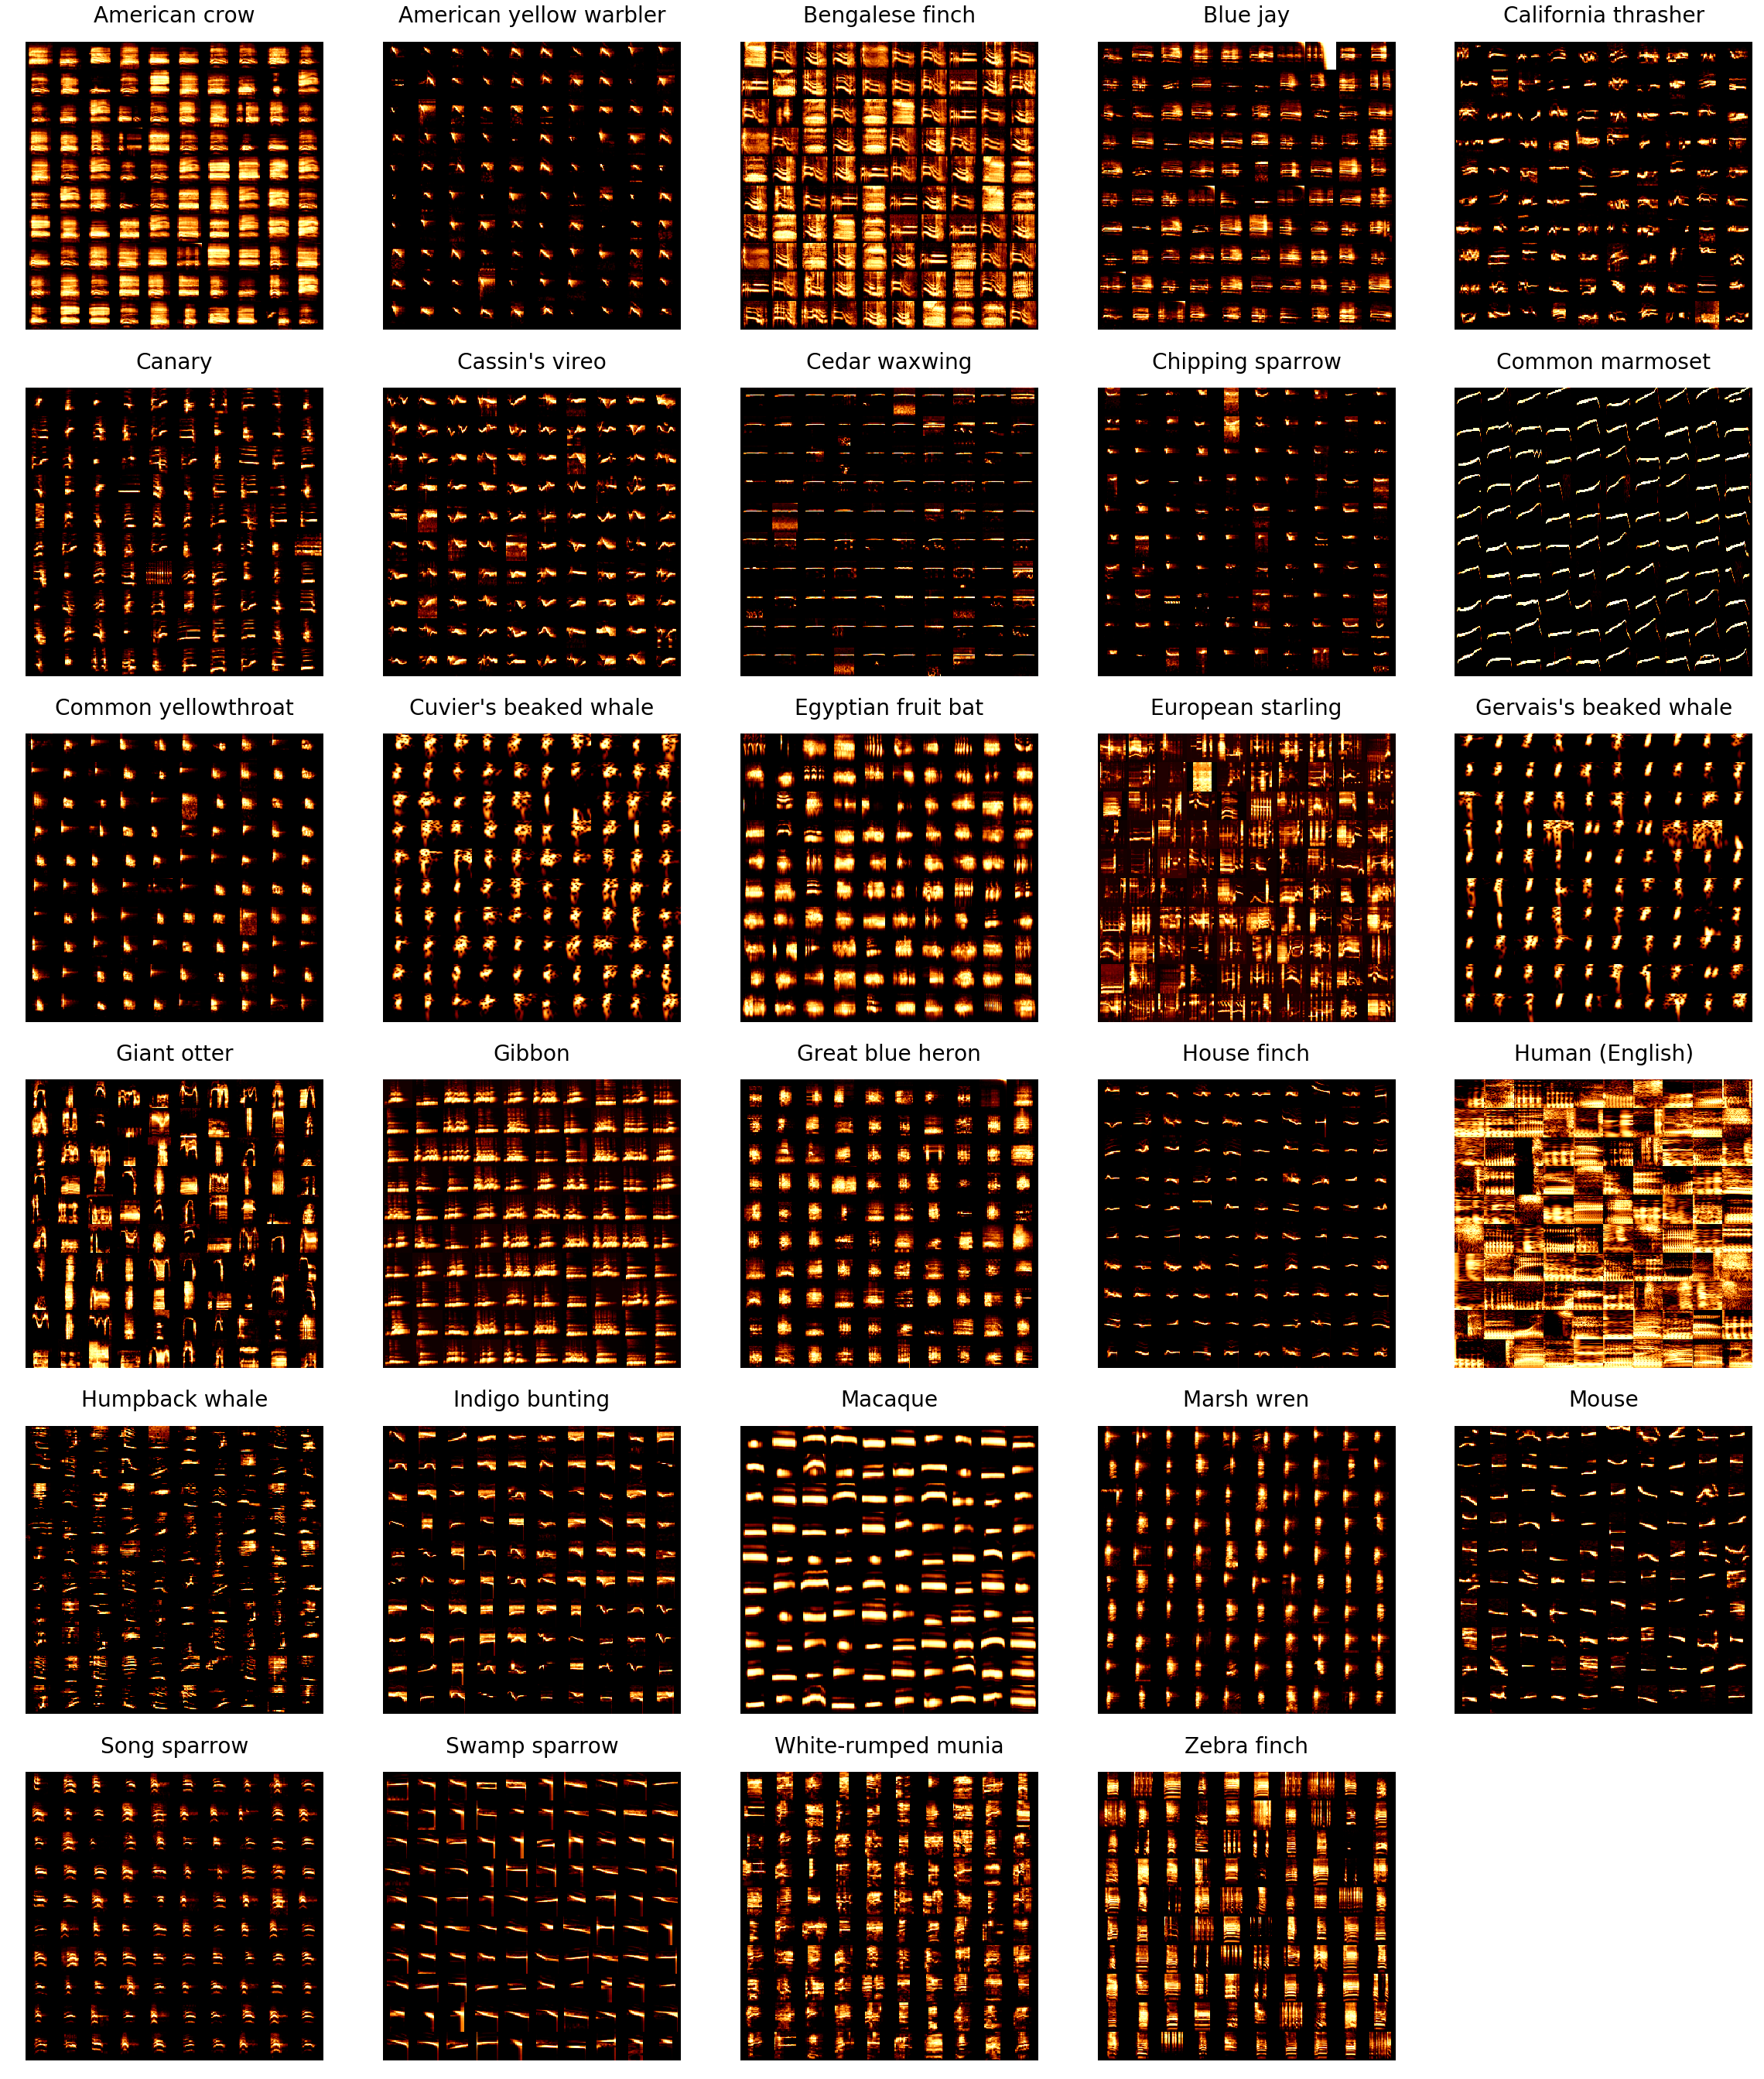

In [135]:
ncols = 5
nrows = int(np.ceil(len(dset_specs.keys())/ ncols) )
zm = 8
fig, axs = plt.subplots(ncols=ncols, nrows= nrows, figsize=(ncols*zm, nrows*zm))
for si, species in tqdm(enumerate(np.sort(list(dset_specs.keys())))):
    ax = axs.flatten()[si]
    specs = dset_specs[species]
    spec_size = np.shape(specs[0])
    canvas = np.zeros((spec_size[0]*10, spec_size[1]*10))
    np.shape(canvas)
    for i in range(10):
        for j in range(10):
            a = i*10+j
            canvas[i*spec_size[0]:(i+1)*spec_size[0], j*spec_size[1]:(j+1)*spec_size[1]] = specs[a] / np.max(specs[a])
            
    ax.matshow(canvas, interpolation = None, origin='lower', aspect='auto', vmin=0, cmap= plt.cm.afmhot)
    ax.set_title(species, fontsize=28)
    ax.axis('off')
for si in range(si, ncols*nrows):
    ax = axs.flatten()[si]
    ax.axis('off')
save_fig(FIGURE_DIR / 'vocalization_examples', dpi=300, save_jpg=True)